<a href="https://colab.research.google.com/github/alexganea7/Mini-projects-for-university-AI-class/blob/main/Ganea_Alexandru_Gabriel%3B_Grupa_311%3B_Mini_proiect_cautare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmi de cautare pentru deplasare intr-un labirint**

---



Problema consta in a gasi o pozitie specifica intr-un labirint avand o pozitie de inceput data. Pentru rezolvarea problemei voi folosi mai multe metode de cautare intr-un graf.

---



In [ ]:
import numpy as np

# **1. Graful de stari**

Primul pas in a rezolva problema consta in a determina graful de stari.

In fiecare nod avem nevoie sa retinem pozitia la care ne aflam, tatal lui pentru a putea determina drumul parcurs, si in functie de algoritmul pe care il folosim, vom avea de retinut si costurile necesare parcurgerii.

Actiunile posibile pe care le putem face reprezinta posibilitatea de a ne mutam cu o patratica in sus/jos/stanga/dreapta in functie de disponibilitate (nu avem voie sa iesim din marginea hartii si nici sa atingem "peretii" care vor fi reprezentati printr-un 1 in matricea reprezentativa).

Starea initiala si starea finala le vom alege alegand orice indecsi pe care ii vrem atata timp cat exista pozitia in matrice si nu reprezinta un "1" in aceasta.

# **2. Matricea labirintului**

Pentru a reprezenta labirintul vom folosi o matrice in care fiecare valoare are o insemnatate diferita cum ar fi:


*   '0' reprezinta o pozitie valida pe care putem continua
*   '1' reprezinta "peretele" deci este o pozitie invalida
*   '2' va fi folosit ulterior pentru o pozitie cu un cost de deplasare diferit

Un exemplu de astfel de matrice ar fi urmatoarea:


```
harta = [ [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,1,1,1,0,1,1,1,1,2,2,2,2,2,2],
          [0,1,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2],
          [0,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,2,2,1],
          [0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,2,2,2,2],
          [1,1,1,1,1,1,0,1,0,1,1,1,1,1,2,2,2,2,2],
          [0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,2,2,2,2],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1],
          [1,1,1,1,1,1,1,1,0,0,0,2,2,2,2,2,2,2,2],
          [2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2],
          [2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2],
          [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2],
          [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
        ]
```
Si putem, de exemplu, sa alegem starea initiala/finala astfel:

```
start, end = (6,6), (0,18)
```

Exemplu grafic de harta:

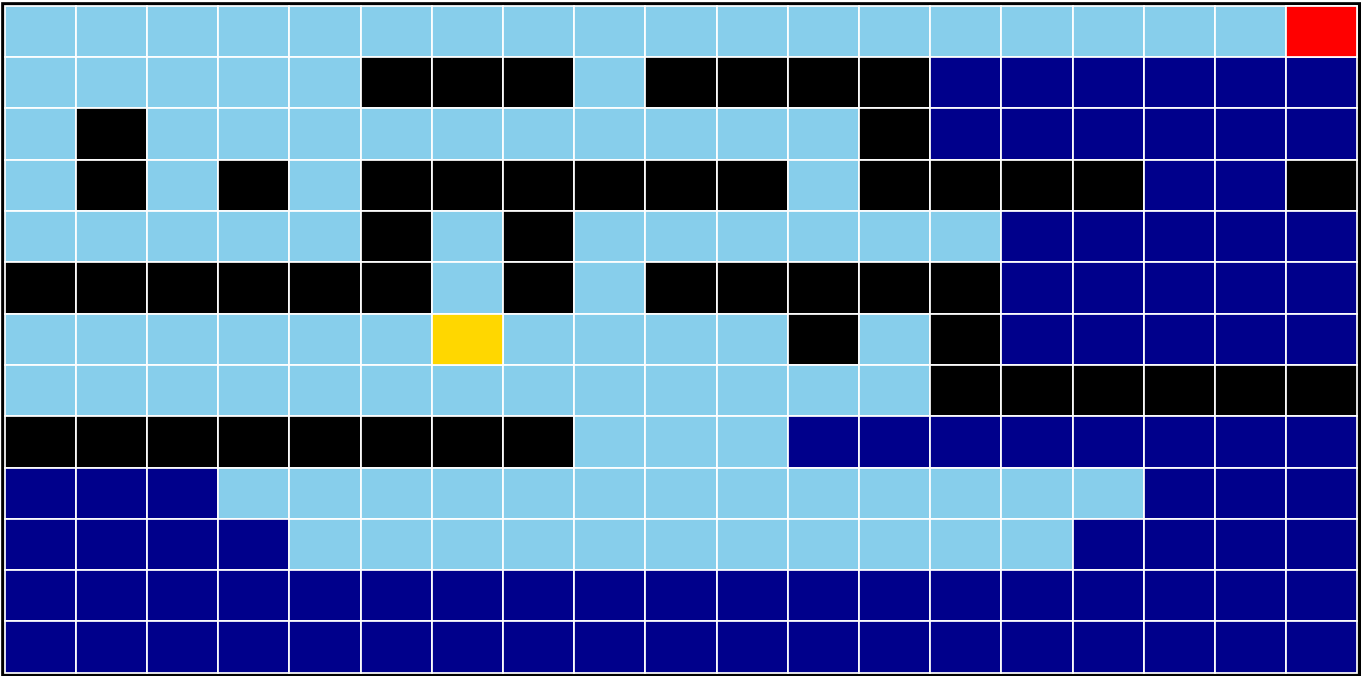

Putem observa ca fiecare dreptunghi are urmatoarele semnificatii:
*   auriu: pozitia de start
*   rosu: pozitia de final
*   negru: perete
*   albastru deschis: pozitie cu cost normal
*   albastru inchis: pozitie cu cost modificat

Pentru exemple vom folosi aceeasi harta dar cu toate nodurile normale, fara noduri cu costuri modificate

In [ ]:
harta =[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9],
        [0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
        [0,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1],
        [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
        [1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0],
        [0,0,0,0,0,0,7,0,0,0,0,1,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1],
        [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        ]
start, end = (0,0), (10,15)

# **3. Functia succesor**

Pentru a determina urmatoarele pozitii valide avem nevoie de o functie succesor care returneaza toate actiunile posibile pe care le putem face la urmatorul pas.



In [ ]:
def succesori(nod, harta): # nod va avea (i,j)
    succesori = []
    n, m = len(harta), len(harta[0])
    i,j = nod
    if i > 0 and harta[i-1][j] != 1: #sus
      succesori.append((i-1, j))
    if j > 0 and harta[i][j-1] != 1: #stanga
      succesori.append((i,j-1))
    if i < n-1 and harta[i+1][j] != 1: #jos
      succesori.append((i+1, j))
    if j < m-1 and harta[i][j+1] != 1: #dreapta
      succesori.append((i,j+1))
    return succesori

print("Succesorii nodului de pe pozitia (7,4) sunt:", succesori((7,4), harta))
print("Succesorii nodului de pe pozitia (0,0) sunt:", succesori((0,0), harta))

Succesorii nodului de pe pozitia (7,4) sunt: [(6, 4), (7, 3), (7, 5)]
Succesorii nodului de pe pozitia (0,0) sunt: [(1, 0), (0, 1)]


# **4. BFS search**

Primul algoritm de cautare pe care il vom folosi este BFS (breadth-first search) care dupa ce ajunge intr-un nod anume, se uita intai la toti vecinii acelui nod, si asa mai departe pana cand ajunge la nodul cautat.

In [ ]:
def bfs(start, final, harta):
  frontiera = [(start, None, None)]
  parcurse = set()
  solutie = [frontiera[-1]]
  parcurse.add(start)
  while(frontiera):
    nod = frontiera.pop(0)
    for succesor in succesori(nod[0], harta):
      if succesor not in parcurse:
        parcurse.add(succesor)
        frontiera.append((succesor, nod[0], solutie.index(nod)))
        solutie.append(frontiera[-1])
        if succesor == final:
          return solutie

Pentru implementare am folosit o coada, in care am pus nodul curent, parintele nodului si optional, pozitia parintelui in lista de solutii(a fost necesar acest lucru pentru a putea obtine drumul de la radacina la scop pentru solutia rezultata). Codul de afisare a drumului parcurs poate fi reprezentat astfel:

In [ ]:
def minimumPathBFS(path): # [0] e curent, [1] e tata, [2] e pozitia tatalui
   minpath = [path[-1][0]]
   pointer = path[path[-1][2]]
   while(pointer[1] is not None):
      minpath.append(pointer[0])
      pointer = path[pointer[2]]
   minpath.append(pointer[0])
   return minpath[::-1]

In continuare, vom rula BFS pe harta si pozitile de start/final definite mai sus si vom vedea si drumul asociat solutiei noastre.

In [ ]:
solutieBFS = bfs(start, end, harta)
print("Solutie:", end=" ")
for s in solutieBFS:
  print(s[0], end="->")

drumBFS = minimumPathBFS(solutieBFS)
print('\nDrumul asociat solutiei:', end=" ")
for d in drumBFS:
  print(d, end="->")
print('\nCost total:', len(solutieBFS))
print('Lungine Drum minim:', len(drumBFS))

Solutie: (0, 0)->(1, 0)->(0, 1)->(2, 0)->(1, 1)->(0, 2)->(3, 0)->(1, 2)->(0, 3)->(4, 0)->(2, 2)->(1, 3)->(0, 4)->(4, 1)->(3, 2)->(2, 3)->(1, 4)->(0, 5)->(4, 2)->(2, 4)->(0, 6)->(4, 3)->(3, 4)->(2, 5)->(0, 7)->(4, 4)->(2, 6)->(0, 8)->(2, 7)->(1, 8)->(0, 9)->(2, 8)->(0, 10)->(2, 9)->(0, 11)->(2, 10)->(0, 12)->(2, 11)->(0, 13)->(3, 11)->(1, 13)->(0, 14)->(4, 11)->(2, 13)->(1, 14)->(0, 15)->(4, 10)->(4, 12)->(2, 14)->(1, 15)->(0, 16)->(4, 9)->(4, 13)->(2, 15)->(1, 16)->(0, 17)->(4, 8)->(4, 14)->(2, 16)->(1, 17)->(0, 18)->(5, 8)->(5, 14)->(4, 15)->(3, 16)->(2, 17)->(1, 18)->(6, 8)->(6, 14)->(5, 15)->(4, 16)->(3, 17)->(2, 18)->(6, 7)->(7, 8)->(6, 9)->(6, 15)->(5, 16)->(4, 17)->(6, 6)->(7, 7)->(8, 8)->(7, 9)->(6, 10)->(6, 16)->(5, 17)->(4, 18)->(5, 6)->(6, 5)->(7, 6)->(9, 8)->(8, 9)->(7, 10)->(6, 17)->(5, 18)->(4, 6)->(6, 4)->(7, 5)->(9, 7)->(10, 8)->(9, 9)->(8, 10)->(7, 11)->(6, 18)->(6, 3)->(7, 4)->(9, 6)->(10, 7)->(11, 8)->(10, 9)->(9, 10)->(8, 11)->(7, 12)->(6, 2)->(7, 3)->(9, 5)->(10, 6)

Pentru vizualizarea grafica a cautarii solutiei si parcurgerea drumului asociat solutiei gasite in exemplele de cautari folosite voi folosi urmatorul cod folosind biblioteca matplotlib.pyplot



```
import numpy as np
from matplotlib import pyplot as plt


def handle_close(event):
    exit()

def plot(harta, drumMinim, drum, start, final):
    m = len(harta[0])
    n = len(harta)
    plt.plot()
    border = plt.Rectangle((0, 0), m, n, fc = 'k', ec = 'k', lw = 4)
    plt.gca().add_patch(border)
   
    plt.axis('off')
    for i in range(n):
        for j in range(m):
            if (harta[i][j] == 1):
                culoare = 'k'
            elif (harta[i][j] == 2):
                culoare = 'darkblue'
            else:
                culoare = 'skyblue'
            patrat = plt.Rectangle((j, n-i-1), 1, 1, fc=culoare, ec='w')
            plt.gca().add_patch(patrat)
    plt.gca().add_patch(plt.Rectangle((start[1],n-start[0]-1), 1, 1, fc='gold', ec='w'))
    plt.gca().add_patch(plt.Rectangle((final[1],n-final[0]-1), 1, 1, fc='red', ec='w'))
    
    for i,j in drum:
        if((i,j)!=start and (i,j)!=final):
            patrat = plt.Rectangle((j+0.25, n-i-0.75), 0.5, 0.5, fc='gold', ec='w')
            plt.gca().add_patch(patrat)
            plt.pause(0.05)
            plt.gcf().canvas.mpl_connect('close_event', handle_close)
    for i,j in drumMinim:
        if((i,j)!=final and (i,j)!=start):
            patrat = plt.Rectangle((j+0.25, n-i-0.75), 0.5, 0.5, fc='red', ec='w')
            plt.gca().add_patch(patrat)
            plt.pause(0.05)
            plt.gcf().canvas.mpl_connect('close_event', handle_close)
    plt.show()

```

*Obs*: codul trebuie rulat inafara colabului pentru a rula fara probleme(in colab in loc sa puna pe acelasi plot va face mai multe ploturi separate) Pentru a vizualiza rezultatul algoritmului de mai sus, mai jos avem gif-ul corespunzator codului


Exemplu BFS pe labirintul de mai sus, patratelele colorate cu galben reprezinta nodurile expandate iar cele cu rosu drumul optim pe solutia noastra


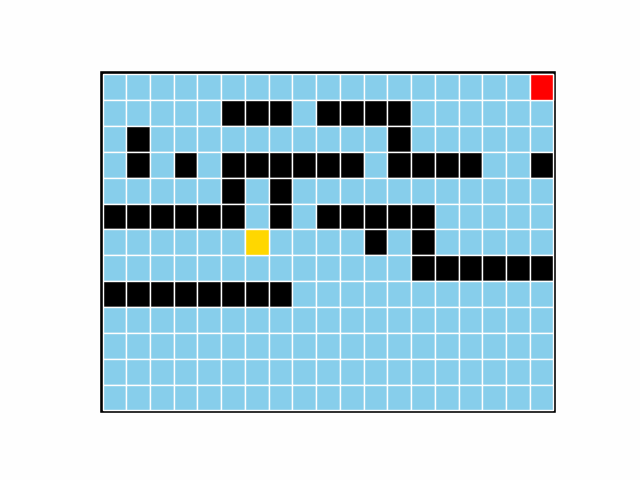

In [ ]:
from IPython.display import Image
Image(url='...')  # external
fname = '/content/drive/MyDrive/chestii/colab/example.gif'
print("Exemplu BFS pe labirintul de mai sus, patratelele colorate cu galben reprezinta nodurile expandate iar cele cu rosu drumul optim pe solutia noastra")
Image(open(fname, 'rb').read())  # local


# **4. A* search**

In codul anterior putem observa ca BFS este optimal in alegerea drumului minim dar acesta necesita un cost mare in functie de situatia in care ne aflam, neavand acces la nicio informatie despre nodul final deci algoritmul trebuie sa faca multi pasi inutili spre gasirea nodului destinatie.

Pentru a rezolva aceasta problema, putem aplica un algoritm de cautare informata, care cunoscand pozitia de start si de final, foloseste niste functii pentru a determina care dintre nodurile urmatoare "merita" explorate.

Algoritmul de cautare A* foloseste doua functii pentru a rezolva aceasta problema. O functie consta in numarul de pasi pe care trebuie sa ii faca algoritmul pentru a ajunge la solutie, iar cea de-a doua functie, numita si functie euristica poate fi aleasa in functie de problema pe care trebuie sa o rezolvam.


# **4.1. Functii euristice**

Prima functie euristica pe care o putem folosi este "Distanta Manhattan" care reprezinta distanta dintre doua puncte calculata ca suma dintre distanta pe orizontala si distanta pe verticala dintre ele. Daca punctul este dat sub forma de coordonate (i,j), distanta Manhattan ar fi:



```

def euristica(nod, final):
    i,j = nod
    ifinal, jfinal = final
    return abs(i-ifinal) + abs(j-jfinal) #manhattan
```


A doua functie euristica pe care o putem folosi este distanta euclidiana calculata folsind functia urmatoare:

def euristica(nod, final):
    i,j = nod
    ifinal, jfinal = final
    return np.sqrt((i-ifinal)**2+(j-jfinal)**2) #dist euclidiana

```
def euristica(nod, final):
    i,j = nod
    ifinal, jfinal = final
    return np.sqrt((i-ifinal)**2+(j-jfinal)**2) #dist euclidiana
```

In [ ]:
def euristica1(nod, final):
    i,j = nod
    ifinal, jfinal = final
    return abs(i-ifinal) + abs(j-jfinal) #manhattan

def euristica2(nod, final):
    i,j = nod
    ifinal, jfinal = final
    return np.sqrt((i-ifinal)**2+(j-jfinal)**2) #dist euclidiana

print("Manhattan:",euristica1((0,0),(10,10)))
print("Euclidiana:",euristica2((0,0),(10,10)))

Manhattan: 20
Euclidiana: 14.142135623730951


# **4.3. A* search algoritm**

Pentru a implementa A* vom avea nevoie de o lista de prioritati pentru a putea extrage nodul cu costul minim intr-un mod eficient.

In [ ]:
def extrage_min(l):
  if len(l)==0:
    return None
  # l[0] = (2, 3)   (nodul 2 cu costul 3)
  m = l[0]
  im = 0
  for i in range(len(l)):
    if l[i][1] < m[1]:
      m = l[i]
      im = i
  l.pop(im)
  return m

def inserare_element_prioritati(element, coada_prioritati):
  if len(coada_prioritati) == 0:
    coada_prioritati.append(element)
  else:
    el_curent = coada_prioritati[0]
    i = 0
    while(el_curent[1] < element[1]):
      el_curent = coada_prioritati[i]
      i += 1
      if i >= len(coada_prioritati):
        break
    if i!=len(coada_prioritati) and i!=0:
      i = i-1
    coada_prioritati.insert(i, element)

#exemplu
coada=[]
n1 = ('a',2)
n2 = ('b',1)
n3 = ('c',3)
inserare_element_prioritati(n1, coada)
inserare_element_prioritati(n2, coada)
inserare_element_prioritati(n3, coada)
print("Coada prioritati:", coada)
print("Nod de cost minim:", extrage_min(coada))

Coada prioritati: [('b', 1), ('a', 2), ('c', 3)]
Nod de cost minim: ('b', 1)


In [ ]:
def astar(start, final, harta, euristica):
    frontiera = []
    solutie = []
    CLOSED = {}
    # parcurs = {}
    inserare_element_prioritati((start, 0, 0, None, None), frontiera) # nod si cost

    while frontiera:
       nod = extrage_min(frontiera)
      #  print(nodp)
       solutie.append(nod)
      #  parcurs[nod[0]] = nod[3]
       CLOSED[nod[0]]=nod[2]
       if(nod[0]==final):
          return solutie
       for succesor in succesori(nod[0], harta):
          if(harta[succesor[0]][succesor[1]] == 2):
            cost = nod[1]+50
          else:
            cost = nod[1]+1
          if(succesor not in CLOSED or cost < CLOSED[succesor]):
            CLOSED[succesor]=cost
            inserare_element_prioritati((succesor, cost+euristica(succesor,final), cost, nod[0], solutie.index(nod)), frontiera)

    return "eroare"

In continuare voi rula codul cu ajutorul unei functii pentru a determina drumul minim, asemanator ca in cazul algoritmului anterior

In [ ]:
def minimumPathASTAR(path): # [0] e curent, [3] e tata, [4] e pozitia tatalui
   minpath = [path[-1][0]]
   pointer = path[path[-1][4]]
   while(pointer[3] is not None):
      minpath.append(pointer[0])
      pointer = path[pointer[4]]
   minpath.append(pointer[0])
   return minpath[::-1]

solutieASTAR = astar(start, end, harta, euristica1)
print("Solutie:", end=" ")
for s in solutieASTAR:
  print(s[0], end="->")

drumASTAR = minimumPathASTAR(solutieASTAR)
print('\nDrumul asociat solutiei:', end=" ")
for d in drumASTAR:
  print(d, end="->")
print('\nCost total:', len(solutieASTAR))
print('Lungine Drum minim:', len(drumASTAR))

Solutie: (0, 0)->(0, 1)->(1, 0)->(2, 0)->(1, 1)->(0, 2)->(0, 3)->(3, 0)->(1, 2)->(2, 2)->(4, 0)->(1, 3)->(0, 4)->(0, 5)->(1, 4)->(4, 1)->(3, 2)->(2, 3)->(4, 2)->(0, 6)->(2, 4)->(2, 5)->(3, 4)->(4, 3)->(0, 7)->(0, 8)->(2, 6)->(4, 4)->(2, 7)->(1, 8)->(0, 9)->(0, 10)->(2, 8)->(2, 9)->(0, 11)->(0, 12)->(2, 10)->(2, 11)->(0, 13)->(0, 14)->(1, 13)->(3, 11)->(4, 11)->(2, 13)->(1, 14)->(0, 15)->(1, 15)->(2, 14)->(4, 12)->(0, 16)->(4, 10)->(4, 13)->(2, 15)->(1, 16)->(0, 17)->(4, 9)->(4, 14)->(2, 16)->(1, 17)->(4, 15)->(5, 14)->(3, 16)->(0, 18)->(4, 8)->(6, 14)->(5, 15)->(2, 17)->(4, 16)->(6, 15)->(1, 18)->(5, 16)->(3, 17)->(6, 16)->(4, 17)->(5, 8)->(2, 18)->(5, 17)->(6, 17)->(4, 18)->(6, 8)->(5, 18)->(6, 18)->(6, 9)->(7, 8)->(6, 7)->(8, 8)->(7, 9)->(6, 10)->(7, 7)->(6, 6)->(7, 10)->(9, 8)->(8, 9)->(7, 6)->(9, 9)->(10, 8)->(7, 11)->(8, 10)->(9, 7)->(5, 6)->(6, 5)->(7, 12)->(8, 11)->(9, 10)->(10, 9)->(11, 8)->(10, 7)->(7, 5)->(10, 10)->(9, 11)->(8, 12)->(9, 6)->(11, 9)->(6, 12)->(8, 13)->(9, 12)-

Vizualizare grafica a algoritmului pe acelasi exemplu:

Exemplu A* pe labirintul de mai sus, patratelele colorate cu galben reprezinta nodurile expandate iar cele cu rosu drumul optim pe solutia noastra


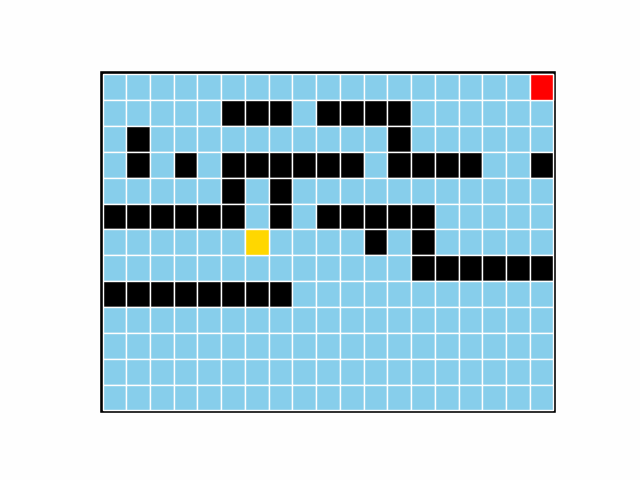

In [ ]:
from IPython.display import Image

Image(url='...')  # external
fname = '/content/drive/MyDrive/chestii/colab/example2.gif'
print("Exemplu A* pe labirintul de mai sus, patratelele colorate cu galben reprezinta nodurile expandate iar cele cu rosu drumul optim pe solutia noastra")
Image(open(fname, 'rb').read())  # local


# **5. Comparatie intre A* si BFS**


In [ ]:
print("Pe harta labirintului data, costurile sunt:")
print("\tBFS:", len(solutieBFS))
print("\tA*:", len(solutieASTAR))
print("Iar lungimea drumului optimal in functie de solutile algoritmilor sunt:")
print("\tBFS:", len(drumBFS))
print("\tA*:", len(drumASTAR))

Pe harta labirintului data, costurile sunt:
	BFS: 172
	A*: 137
Iar lungimea drumului optimal in functie de solutile algoritmilor sunt:
	BFS: 32
	A*: 32


Putem observa ca lungimea drumul este egala si este chiar lungimea minima pentru a ajunge in nodul final. Cu toate acestea, in cazul algoritmului BFS, costul pentru a ajunge la acel drum este mai mare, ceea ce este normal tinand cont ca nu are nici o regula de a merge spre solutie. In continuare vom compara cele doua euristici pentru A* sa vedem pe harta respectiva care ar fi mai optima.

# **6. Comparatie intre euristicile folosite in cazul algoritmului A***


In [ ]:
solutieEuristica1 = astar(start, end, harta, euristica1)
solutieEuristica2 = astar(start, end, harta, euristica2)

print("Pentru distanta manhattan avem costul:", len(solutieEuristica1))
print("Pentru distanta euclidiana avem costul:", len(solutieEuristica2))


Pentru distanta manhattan avem costul: 137
Pentru distanta euclidiana avem costul: 133


Pe harta din exemplele folosite, se observa ca distanta euclidiana este putin mai eficienta. Acest lucru nu este o regula totusi. In functie de harta folosita, fiecare dintre cele doua poate fi mai eficienta.